<a href="https://colab.research.google.com/github/ahmdhqnn/KAT-Praktikum/blob/main/Week3/Assignment_Modul_Minggu3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Soal 1

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [5]:
df['bmi'].fillna(df['bmi'].median())

,bmi
0,36.6
1,28.1
2,32.5
3,34.4
4,24.0
...,...
5105,28.1
5106,40.0
5107,30.6
5108,25.6


In [6]:
Q1_glucose = df['avg_glucose_level'].quantile(0.25)
Q3_glucose = df['avg_glucose_level'].quantile(0.75)
IQR_glucose = Q3_glucose - Q1_glucose
lower_bound_glucose = Q1_glucose - 1.5 * IQR_glucose
upper_bound_glucose = Q3_glucose + 1.5 * IQR_glucose
outlier_glucose = df[(df['avg_glucose_level'] >= lower_bound_glucose) & (df['avg_glucose_level'] <= upper_bound_glucose)]
outlier_glucose['avg_glucose_level']

,avg_glucose_level
2,105.92
6,70.09
7,94.39
8,76.15
9,58.57
...,...
5105,83.75
5106,125.20
5107,82.99
5108,166.29


In [7]:
Q1_bmi = df['bmi'].quantile(0.25)
Q3_bmi = df['bmi'].quantile(0.75)
IQR = Q3_bmi - Q1_bmi
lower_bound = Q1_bmi - 1.5 * IQR
upper_bound = Q3_bmi + 1.5 * IQR
outlier = df[(df['bmi'] >= lower_bound) & (df['bmi'] <= upper_bound)]
outlier['bmi']

,bmi
0,36.6
2,32.5
3,34.4
4,24.0
5,29.0
...,...
5104,18.6
5106,40.0
5107,30.6
5108,25.6


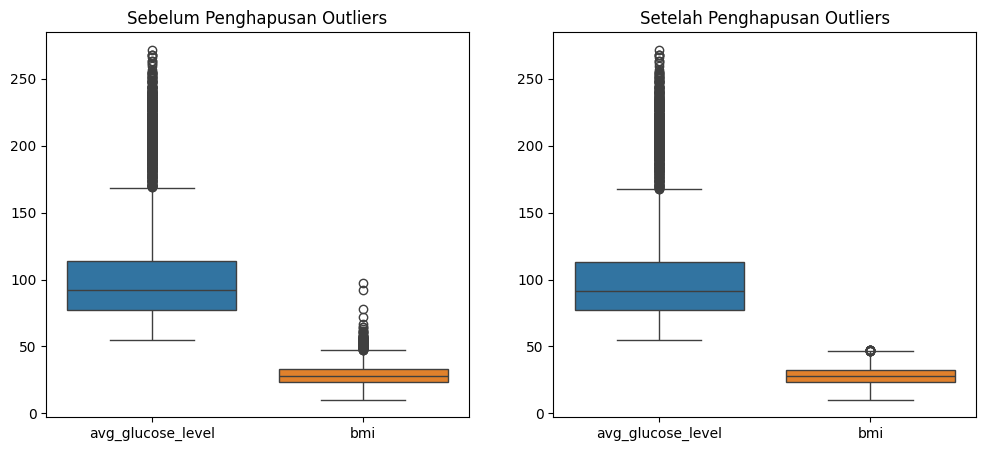

In [8]:
# Visualisasi
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Boxplot sebelum
sns.boxplot(data=df[['avg_glucose_level', 'bmi']], ax=axes[0])
axes[0].set_title("Sebelum Penghapusan Outliers")

# Boxplot setelah
sns.boxplot(data=outlier[['avg_glucose_level', 'bmi']], ax=axes[1])
axes[1].set_title("Setelah Penghapusan Outliers")

plt.show()

Soal 2


In [9]:
df['z-score'] = (df['avg_glucose_level'] - df['avg_glucose_level'].mean()) / df['avg_glucose_level'].std()
df['z-score']

,z-score
0,2.706111
1,2.121351
2,-0.005028
3,1.437217
4,1.501038
...,...
5105,-0.494609
5106,0.420734
5107,-0.511393
5108,1.328127


In [10]:
import numpy as np

outliers = df[np.abs(df['z-score']) > 3]
outliers

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,z-score
33,54401,Male,80.0,0,1,Yes,Self-employed,Urban,252.72,30.5,formerly smoked,1,3.236767
45,19824,Male,76.0,1,0,Yes,Private,Rural,243.58,33.6,never smoked,1,3.034928
122,13491,Male,80.0,0,0,Yes,Private,Rural,259.63,31.7,smokes,1,3.389361
123,44033,Male,56.0,1,0,Yes,Private,Rural,249.31,35.8,never smoked,1,3.161464
135,71279,Female,71.0,0,0,Yes,Govt_job,Urban,263.32,38.7,never smoked,1,3.470847
193,69112,Male,68.0,1,1,Yes,Private,Rural,271.74,31.1,smokes,1,3.656787
196,58267,Male,70.0,1,0,Yes,Private,Rural,242.52,45.5,formerly smoked,1,3.011519
220,20463,Male,81.0,1,1,Yes,Private,Urban,250.89,28.1,smokes,1,3.196355
243,40460,Female,68.0,1,1,Yes,Private,Urban,247.51,40.5,formerly smoked,1,3.121714
256,41413,Female,75.0,0,1,Yes,Self-employed,Rural,243.53,27.0,never smoked,0,3.033823


In [11]:
Q1_glucose = df['avg_glucose_level'].quantile(0.25)
Q3_glucose = df['avg_glucose_level'].quantile(0.75)
IQR_glucose = Q3_glucose - Q1_glucose
lower_bound_glucose = Q1_glucose - 1.5 * IQR_glucose
upper_bound_glucose = Q3_glucose + 1.5 * IQR_glucose

print(lower_bound_glucose)
print(upper_bound_glucose)

21.977500000000006
169.35750000000002


In [12]:
gantiBatas = df['avg_glucose_level'].apply(lambda x:
                                             lower_bound_glucose if x < lower_bound_glucose else
                                             upper_bound_glucose if x > upper_bound_glucose else
                                             x
                                             )
gantiBatas

,avg_glucose_level
0,169.3575
1,169.3575
2,105.9200
3,169.3575
4,169.3575
...,...
5105,83.7500
5106,125.2000
5107,82.9900
5108,166.2900


In [13]:
# Menghitung statistik sebelum dan sesudah
mean_before = df['avg_glucose_level'].mean()
std_before = df['avg_glucose_level'].std()

mean_after = df['avg_glucose_level'].mean()
std_after = df['avg_glucose_level'].std()

# Menampilkan hasil
print(f"Mean sebelum penggantian outliers: {mean_before}")
print(f"Standar deviasi sebelum penggantian outliers: {std_before}")
print("-" * 20)
print(f"Mean setelah penggantian outliers: {mean_after}")
print(f"Standar deviasi setelah penggantian outliers: {std_after}")

Mean sebelum penggantian outliers: 106.1476771037182
Standar deviasi sebelum penggantian outliers: 45.28356015058203
--------------------
Mean setelah penggantian outliers: 106.1476771037182
Standar deviasi setelah penggantian outliers: 45.28356015058203


Soal 3

In [14]:
from imblearn.over_sampling import SMOTE

df.dropna(inplace=True)

numeric_features = ['age', 'avg_glucose_level', 'bmi']
X = df[numeric_features]
y = df['stroke']



In [15]:
print("SEBELUM OVERSAMPLING")
print("="*25)
print(y.value_counts())
print("="*25)

SEBELUM OVERSAMPLING
stroke
0    4700
1     209
Name: count, dtype: int64


In [16]:
smote = SMOTE()
X_res, y_res = smote.fit_resample(X, y)

In [17]:
print("SETELAH OVERSAMPLING")
print("="*25)
print(pd.Series(y_res).value_counts())

SETELAH OVERSAMPLING
stroke
1    4700
0    4700
Name: count, dtype: int64


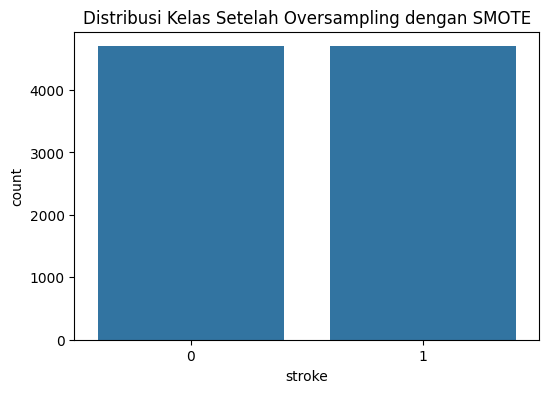

In [18]:
plt.figure(figsize=(6, 4))
sns.countplot(x=y_res)
plt.title("Distribusi Kelas Setelah Oversampling dengan SMOTE")
plt.show()